## Graph Algorithms BFS, DFS & Shortest Path

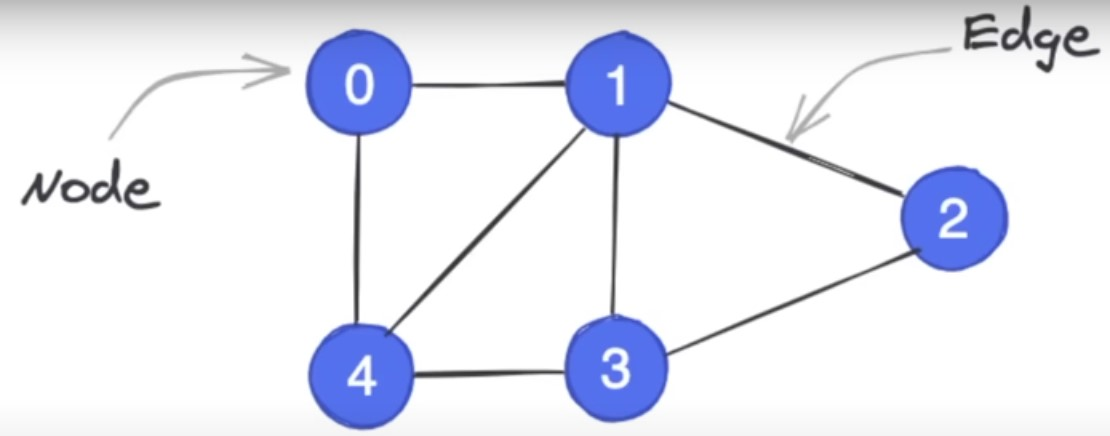

In [1]:
num_nodes = 5
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]

### Adjacency List

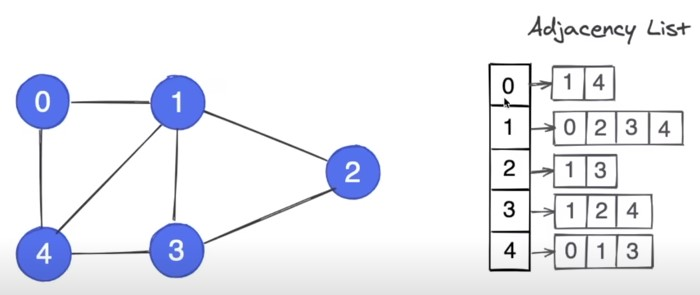

In [2]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.edges = edges
        self.data = [[] for _ in range(num_nodes)]
        for n1, n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
        
    def __repr__(self):
        return '\n'.join(["{}, {}".format(n, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self):
        return __repr__()

In [3]:
graph1 = Graph(num_nodes, edges)
graph1

0, [1, 4]
1, [0, 2, 3, 4]
2, [1, 3]
3, [1, 2, 4]
4, [0, 1, 3]

### Adjacency Matrix

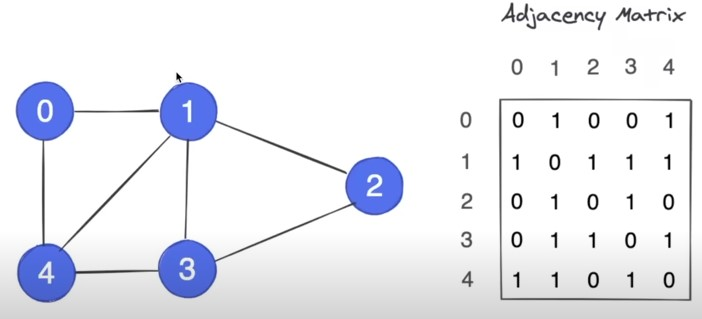

In [4]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.edges = edges
        self.data = [[0] for _ in range(num_nodes)]
        for i in range(num_nodes):
            self.data[i] = [0] * num_nodes
        for n1, n2 in edges:
            self.data[n1][n2] = 1
            self.data[n2][n1] = 1
    
    def __repr__(self):
        return '\n'.join(' '.join(map(str, row)) for row in self.data)
    
    def __str__(self):
        return __repr__()

In [5]:
graph2 = Graph(num_nodes, edges)
graph2

0 1 0 0 1
1 0 1 1 1
0 1 0 1 0
0 1 1 0 1
1 1 0 1 0

## Graph Traversal

### Breadth-First Search

In [6]:
def bfs(graph, root):
    queue = []
    discovered = [False] * len(graph.data)
    distance = [None] * len(graph.data)
    parent = [None] * len(graph.data)

    discovered[root] = True
    queue.append(root)
    distance[root] = 0
    idx = 0

    while idx < len(queue):
        # dequeue
        current = queue[idx]
        idx += 1

        # Check all adges of current
        for node in graph.data[current]:
            if not discovered[node]:
                distance[node] = 1 + distance[current]
                parent[node] = current
                discovered[node] = True
                queue.append(node)
    return queue, distance, parent

In [7]:
graph1

0, [1, 4]
1, [0, 2, 3, 4]
2, [1, 3]
3, [1, 2, 4]
4, [0, 1, 3]

In [8]:
test = bfs(graph1, 3)
test

([3, 1, 2, 4, 0], [2, 1, 1, 0, 1], [1, 3, 3, None, 3])

### DFS

In [9]:
def dfs(graph, root):
    stack = []
    discovered = [False] * len(graph.data)
    result = []

    stack.append(root)
    while len(stack) > 0:
        current = stack.pop()
        if not discovered[current]:
            discovered[current] = True
            result.append(result)
            for node in graph.data[current]:
                if not discovered[node]:
                    stack.append(node)
    return result

### Weighted Graphs

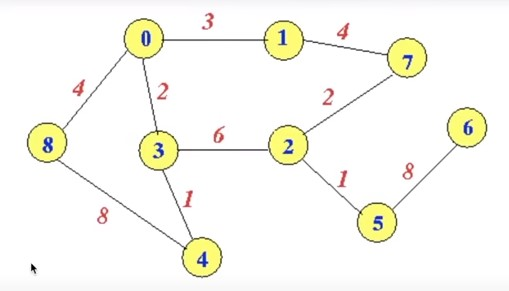

In [10]:
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]

### Directed Graphs

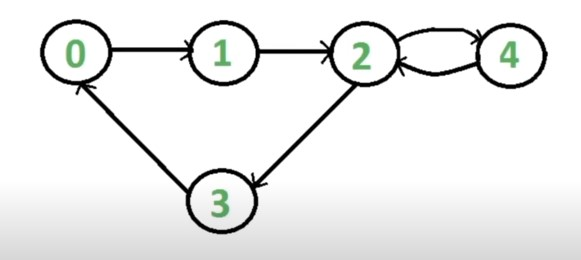

In [11]:
edges6 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]
num_nodes6 = 5

In [12]:
class Graph:
    def __init__(self, num_nodes, edges, directed=False, weighted=False):
        self.num_nodes = num_nodes
        self.directed = directed
        self.weighted = weighted
        self.data = [[] for _ in range(num_nodes)]
        self.weight = [[] for _ in range(num_nodes)]
        for edge in edges:
            if self.weighted:
                node1, node2, weight = edge
                self.data[node1].append(node2)
                self.weight[node1].append(weight)
                if not directed:
                    self.data[node2].append(node1)
                    self.weight[node2].append(weight)
            else:
                node1, node2 = edge
                self.data[node1].append(node2)
                if not directed:
                    self.data[node2].append(node1)

    def __repr__(self):
        result = ""
        if self.weighted:
            for i, (nodes, weights) in enumerate(zip(self.data, self.weight)):
                result += "{}: {}\n".format(i, list(zip(nodes, weights)))
        else:
            for i, nodes in enumerate(self.data):
                result += "{}: {}\n".format(i, nodes)
        return result

In [13]:
graph2 = Graph(num_nodes, edges)
graph2

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [14]:
graph3 = Graph(num_nodes5, edges5, weighted=True)
graph3

0: [(1, 3), (3, 2), (8, 4)]
1: [(0, 3), (7, 4)]
2: [(7, 2), (3, 6), (5, 1)]
3: [(0, 2), (2, 6), (4, 1)]
4: [(3, 1), (8, 8)]
5: [(2, 1), (6, 8)]
6: [(5, 8)]
7: [(1, 4), (2, 2)]
8: [(0, 4), (4, 8)]

In [15]:
graph4 = Graph(num_nodes6, edges6, directed=True)
graph4

0: [1]
1: [2]
2: [3, 4]
3: [0]
4: [2]

## Shortest Paths

### Question

Write a function to find a length of the shortest path between two nodes in a weighted directed graph

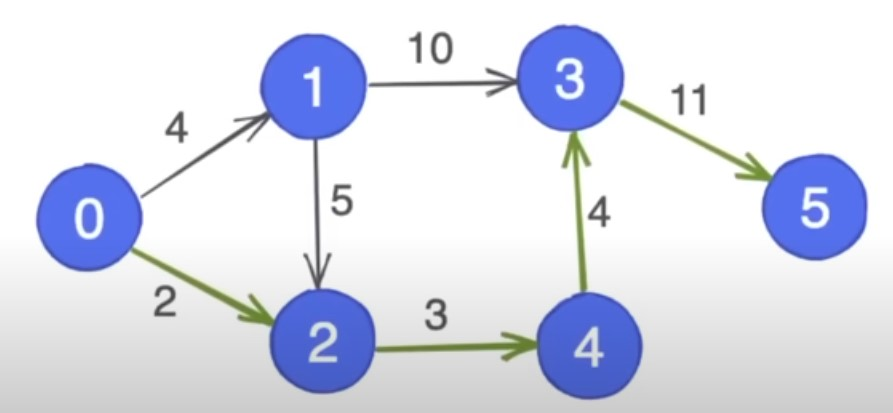

### Dijkstra's Algorithm

In [16]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]

In [29]:
def find_shortest_path(graph, source, target):
    visited = [False] * len(graph.data)
    distance = [float('inf')] * len(graph.data)
    parent = [None] * len(graph.data)
    queue = []

    distance[source] = 0
    queue.append(source)
    idx = 0

    while idx < len(queue) and not visited[target]:
        current = queue[idx]
        idx += 1
        visited[current] = True
        # Update distances of all the neighbors
        update_distances(graph, current, distance, parent)
        # Find the first unvisited node with the smallest distance
        next_node = pick_next_node(distance, visited)
        if next_node:
            queue.append(next_node)
    return distance[target], parent

def update_distances(graph, current, distance, parent=None):
    neighbors = graph.data[current]
    weights = graph.weight[current]
    for i, node in enumerate(neighbors):
        weight = weights[i]
        if distance[current] + weight < distance[node]:
            distance[node] = distance[current] + weight
            if parent:
                parent[node] = current

def pick_next_node(distance, visited):
    min_distance = float('inf')
    min_node = None

    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_distance:
            min_distance = distance[node]
            min_node = node
    return min_node

In [24]:
graph_final = Graph(num_nodes7, edges7, weighted=True, directed=True)
graph_final

0: [(1, 4), (2, 2)]
1: [(2, 5), (3, 10)]
2: [(4, 3)]
3: [(5, 11)]
4: [(3, 4)]
5: []

In [30]:
find_shortest_path(graph_final, 0, 5)

(20, [None, 0, 0, 4, 2, 3])